In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
pd.options.mode.copy_on_write = True

In [ ]:
data = pd.read_csv(r'C:\Users\Максим\Desktop\Курсовая\fiscal_data_2020-10-11.csv\fiscal_data_2020-10-11.csv',
                   nrows=10000,
                   on_bad_lines = 'skip',
                   header=None)

In [3]:
i = 0
SET = set()
with open(r'C:\Users\Максим\Desktop\Курсовая\fiscal_data_2020-10-11.csv\fiscal_data_2020-10-11.csv', encoding='UTF-8') as f:
    for line in f:
        # print(line, type(line))
        # print(line[33:-34])
        # js = json.load(line)
        if i == 100:
            break
        # if i != 20000:
        new_line = '{"fd_id_external": "' + line[:32] + '","json_external":' + line[33:-33] + '"kkt_id_external":"' + line[-33:-1] + '"}'
        # print(new_line)
        js = json.loads(new_line)
        # print(list(js['json_external'].keys()))
        SET = SET.union(set(js['json_external'].keys()))
            # try:
            #     if js['json_external']['bsoCode'] == 4:
            #         print(i, js['json_external']['bsoCode'])
            #         break
            # except:
            #     # print(i)
            #     pass
            # break
            # i += 1
        # else: break
        i += 1
        # if i == 419:
# print(json.dumps(js, indent=2))  
        
# SET

In [5]:
 len(SET)

86

In [6]:
values = SET

with open("cols_names.txt", "w") as output:
    output.write(str(values))

In [2]:
with open("cols_names.txt", "r") as output:
    data = output.read()

cols = data[1:-1].replace("'", "").split(', ')
cols.remove('items')
cols = set(cols)

In [81]:
with open("filtered_columns.txt", "r") as output:
    data = output.read()

cols = set(data.split('\n'))
cols.add('kkt_id_external')
cols.add('fd_id_external')
cols

{'bsoCode',
 'cashTotalSum',
 'code',
 'counterSubmissionSum',
 'creditSum',
 'ecashTotalSum',
 'fd_id_external',
 'fiscalDocumentFormatVer',
 'internetSign',
 'kkt_id_external',
 'nds0',
 'nds10',
 'nds10110',
 'nds18',
 'nds18118',
 'nds20',
 'ndsCalculated10',
 'ndsCalculated18',
 'ndsCalculated20',
 'ndsNo',
 'operationType',
 'paymentAgentType',
 'postpaymentSum',
 'prepaidSum',
 'prepaymentSum',
 'protocolVersion',
 'provisionSum',
 'receiptCode',
 'requestNumber',
 'retailAddress',
 'taxationType',
 'totalSum'}

In [58]:
types = {
    'bsoCode': 'int16',
    'cashTotalSum': 'int32',
    'code': 'int16',
    'counterSubmissionSum': 'int32',
    'creditSum': 'int32',
    'ecashTotalSum': 'int32',
    'fiscalDocumentFormatVer': 'int16',
    'internetSign': 'int16',
    'nds0': 'int32',
    'nds10': 'int32',
    'nds10110': 'int32',
    'nds18': 'int32',
    'nds18118': 'int32',
    'nds20': 'int32',
    'ndsCalculated10': 'int32',
    'ndsCalculated18': 'int32',
    'ndsCalculated20': 'int32',
    'ndsNo': 'int32',
    'operationType': 'int16',
    'paymentAgentType': 'int16',
    'postpaymentSum': 'int32',
    'prepaidSum': 'int32',
    'prepaymentSum': 'int32',
    'protocolVersion': 'int16',
    'provisionSum': 'int32',
    'receiptCode': 'int16',
    'requestNumber': 'int32',
    'retailAddress': 'string',
    'taxationType': 'int16',
    'totalSum': 'int32'
}

In [24]:
# data_with_columns = pd.DataFrame(columns=sorted(cols))
data_with_columns = pd.DataFrame(columns=sorted(cols))
# data_with_columns = data_with_columns.astype({"totalSum": float, "taxationType": int})
# data_with_columns

In [ ]:
i = 0
with open(r'C:\Users\Максим\Desktop\Курсовая\fiscal_data_2020-10-11.csv\fiscal_data_2020-10-11.csv', encoding='UTF-8') as f:
    for line in f:
        print(i)
        new_line = '{"fd_id_external": "' + line[:32] + '","json_external":' + line[33:-33] + '"kkt_id_external":"' + line[-33:-1] + '"}'
        js = json.loads(new_line)
        for key in js['json_external'].keys():
            data_with_columns.loc[i, key] = js['json_external'][key]
        i += 1

In [64]:
import pandas as pd
import json
def func(s):
    js = json.loads(s)
    return js

dt_data = pd.read_csv(r'C:\Users\Максим\Desktop\Курсовая\fiscal_data_2020-10-11.csv\fiscal_data_2020-10-11.csv', 
                      encoding='UTF-8', nrows = 1000, sep='☏', header=None)
dt_data['1'] = dt_data[0].apply(lambda s: '{"fd_id_external": "' + s[:32] + '","json_external":' + s[33:-33] + ',"kkt_id_external":"' + s[-33:-1] + '"}')

C:\Users\Максим\AppData\Local\Temp\ipykernel_20228\3290065670.py:7: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  dt_data = pd.read_csv(r'C:\Users\Максим\Desktop\Курсовая\fiscal_data_2020-10-11.csv\fiscal_data_2020-10-11.csv',


In [66]:
dt_data['1'].apply(lambda x: func(x))

0      {'fd_id_external': 'e35d7164ee96e9aaf68b73c96f...
1      {'fd_id_external': 'e35d7164ee96e9aaf68b73c96f...
2      {'fd_id_external': 'e35d7164ee96e9aaf68b73c96f...
3      {'fd_id_external': 'e35d7164ee96e9aaf68b73c96f...
4      {'fd_id_external': 'e35d7164ee96e9aaf68b73c96f...
                             ...                        
995    {'fd_id_external': 'd5f2d6ed3ee4568229ecc8d7b3...
996    {'fd_id_external': 'd5f2d6ed3ee4568229ecc8d7b3...
997    {'fd_id_external': 'd5f2d6ed3ee4568229ecc8d7b3...
998    {'fd_id_external': 'c59d4de1192827750715ad5edb...
999    {'fd_id_external': 'c59d4de1192827750715ad5edb...
Name: 1, Length: 1000, dtype: object

In [110]:
import pandas as pd
import json


dt_data = pd.read_csv(r'C:\Users\Максим\Desktop\Курсовая\fiscal_data_2020-10-11.csv\fiscal_data_2020-10-11.csv', 
                      encoding='UTF-8', nrows = 100000, sep='☏', header=None, chunksize=10000)
for x in dt_data:
    new_data = pd.DataFrame(index=range(10000), columns=sorted(cols))
    i = 0
    for line in x[0]:
        new_line = '{"fd_id_external": "' + line[:32] + '","json_external":' + line[33:-33] + ',"kkt_id_external":"' + line[-33:-1] + '"}'
        js = json.loads(new_line)

        new_data.loc[i, "fd_id_external"] = js["fd_id_external"]
        new_data.loc[i, "kkt_id_external"] = js["kkt_id_external"]
        for key in set(js['json_external'].keys()) & cols:
            new_data.loc[i, key] = js['json_external'][key]
        i += 1

C:\Users\Максим\AppData\Local\Temp\ipykernel_20228\83861478.py:5: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  dt_data = pd.read_csv(r'C:\Users\Максим\Desktop\Курсовая\fiscal_data_2020-10-11.csv\fiscal_data_2020-10-11.csv',


In [104]:
i = 0
c_error = 0
with open(r'C:\Users\Максим\Desktop\Курсовая\fiscal_data_2020-10-11.csv\fiscal_data_2020-10-11.csv', encoding='UTF-8') as f:
    for line in f:
        # if i % 10000 == 0:
        print(i)
        if i == 10000:
            break
        new_line = '{"fd_id_external": "' + line[:32] + '","json_external":' + line[33:-33] + '"kkt_id_external":"' + line[-33:-1] + '"}'
        print(new_line)
        break
        # js = json.loads(new_line)
        # # print({"fd_id_external": js["fd_id_external"], 
        # #        "kkt_id_external": js["kkt_id_external"],
        # #        **js['json_external']})
        # # data_with_columns.append({"fd_id_external": js["fd_id_external"], 
        # #                             "kkt_id_external": js["kkt_id_external"],
        # #                             **js['json_external']})
        # # break
        # data_with_columns.loc[i, "fd_id_external"] = js["fd_id_external"]
        # data_with_columns.loc[i, "kkt_id_external"] = js["kkt_id_external"]
        # for key in set(js['json_external'].keys()) & cols:
        #     data_with_columns.loc[i, key] = js['json_external'][key]
        # i += 1

0
{"fd_id_external": "e35d7164ee96e9aaf68b73c96fcb5bdc","json_external":{"receiptCode":3,"fiscalDocumentNumber":11278,"dateTime":"2020-10-11","shiftNumber":35,"requestNumber":48,"operationType":1,"totalSum":9215,"items":[{"name":"Продажа на сумму","price":9215,"quantity":1,"sum":9215}],"cashTotalSum":9215,"ecashTotalSum":0,"ndsNo":9215,"retailAddress":"652888, Кемеровская область, г. Междуреченск, ул. Октябрьская, д. 3А","taxationType":8},"kkt_id_external":"137f0b74c99ad372af7022794574d8e4"}


In [26]:
pd.DataFrame({"fd_id_external": js["fd_id_external"], 
                                    "kkt_id_external": js["kkt_id_external"],
                                    **js['json_external']})

,fd_id_external,kkt_id_external,receiptCode,fiscalDocumentNumber,dateTime,shiftNumber,requestNumber,operationType,totalSum,items,cashTotalSum,ecashTotalSum,ndsNo,retailAddress,taxationType
0,e35d7164ee96e9aaf68b73c96fcb5bdc,137f0b74c99ad372af7022794574d8e4,3,11278,2020-10-11,35,48,1,9215,"{'name': 'Продажа на сумму', 'price': 9215, 'q...",9215,0,9215,"652888, Кемеровская область, г. Междуреченск, ...",8


In [27]:
pd.concat([data_with_columns, pd.DataFrame({"fd_id_external": js["fd_id_external"], 
                                    "kkt_id_external": js["kkt_id_external"],
                                    **js['json_external']})], axis=1, join='left')

ValueError: Only can inner (intersect) or outer (union) join the other axis

In [18]:
data_with_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   bsoCode                  108 non-null     object
 1   cashTotalSum             99950 non-null   object
 2   code                     2795 non-null    object
 3   counterSubmissionSum     9922 non-null    object
 4   creditSum                19535 non-null   object
 5   ecashTotalSum            99940 non-null   object
 6   fd_id_external           100000 non-null  object
 7   fiscalDocumentFormatVer  19529 non-null   object
 8   internetSign             3238 non-null    object
 9   kkt_id_external          100000 non-null  object
 10  nds0                     2820 non-null    object
 11  nds10                    26233 non-null   object
 12  nds10110                 63 non-null      object
 13  nds18                    20038 non-null   object
 14  nds18118            

<Axes: >

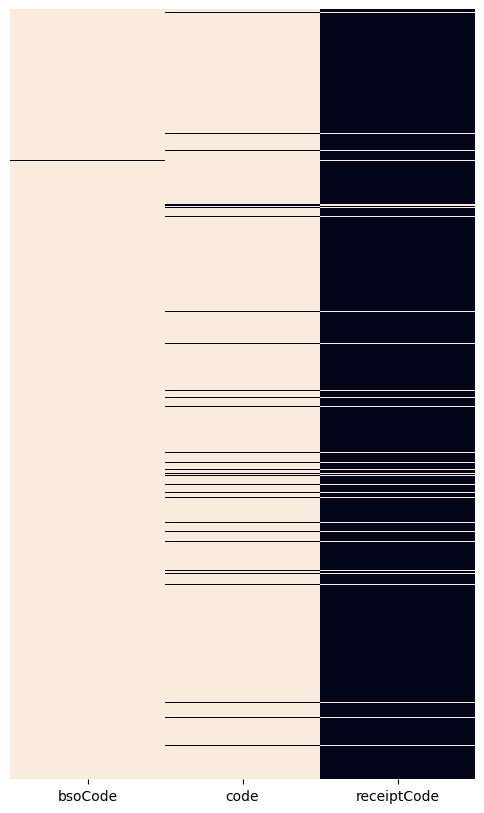

In [19]:
plt.figure(figsize=(6, 10))
sns.heatmap(data_with_columns[['bsoCode', 'code', 'receiptCode']].isnull(), yticklabels=False, cbar=False)

In [20]:
data_with_columns['receiptCode'].fillna(data_with_columns['code'].replace(3, 31), inplace=True)
data_with_columns['receiptCode'].fillna(data_with_columns['bsoCode'], inplace=True)

C:\Users\Максим\AppData\Local\Temp\ipykernel_6508\829266656.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_with_columns['receiptCode'].fillna(data_with_columns['bsoCode'], inplace=True)


<Axes: >

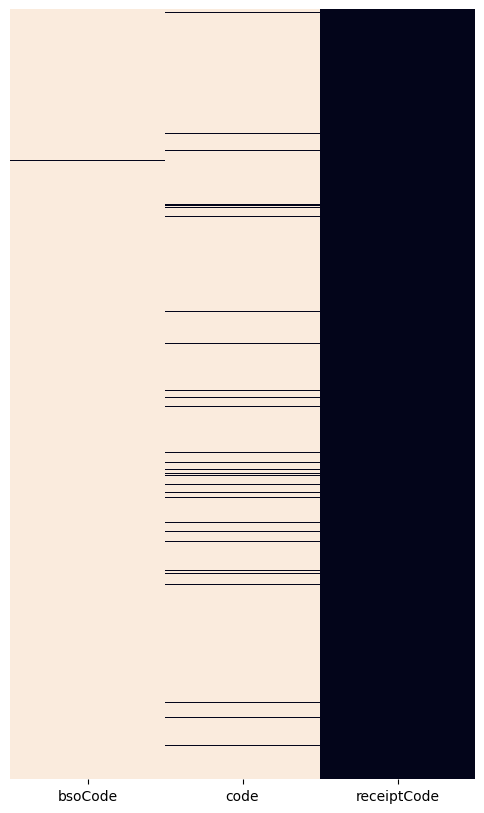

In [21]:
plt.figure(figsize=(6, 10))
sns.heatmap(data_with_columns[['bsoCode', 'code', 'receiptCode']].isnull(), yticklabels=False, cbar=False)

In [22]:
data_with_columns['receiptCode'].value_counts()

receiptCode
3.0     97097
31.0     2795
4.0       108
Name: count, dtype: int64

In [101]:
data_with_columns.drop(['code', 'bsoCode'], axis=1, inplace=True)

<Axes: xlabel='totalSum', ylabel='Count'>

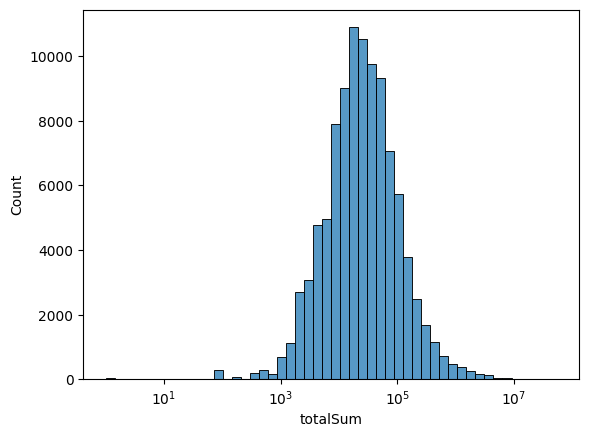

In [23]:
sns.histplot(data_with_columns['totalSum'], bins=50, log_scale=True)

In [24]:
data_with_columns.loc[data_with_columns['cashTotalSum'].isna(), 'cashTotalSum'] = 0
data_with_columns.loc[data_with_columns['ecashTotalSum'].isna(), 'ecashTotalSum'] = 0

In [25]:
data_with_columns['retailAddress'].value_counts()

retailAddress
430031,г. Саранск ул.Косарева, д. 74, п.1                                    95
61 - Ростовская область, 344002, Ростов-на-Дону г, Большая Садовая ул, 45    80
385018, Республика Адыгея, г. Майкоп, ул. Димитрова, 21 А                    67
396072,Воронежская обл., г.Нововоронеж, ул.Космонавтов, д.43Б                63
308009,г. Белгород бул. Народный, 80б                                        61
                                                                             ..
Барнаул ул.Малахова 62                                                        1
216400, Смоленская область, г. Десногорск,  Центральная часть города          1
63-Самарская область, г Самара, ул Победы, 121                                1
  рп. Селятино, ул. Теннисная, д. 47/1                                        1
197373, г.Санкт-Петербург, ул.Долгоозерная, д.12, к.2, пом.2Н                 1
Name: count, Length: 553, dtype: int64

In [26]:
# средний чек больше при оплате электронно
data_with_columns['cashTotalSum'].mean(), data_with_columns['ecashTotalSum'].mean()

(30698.51236487635, 48477.774962250376)

In [27]:
# рейтинг самые большие средние чеки
(data_with_columns.groupby('retailAddress')['totalSum'].sum() / data_with_columns.groupby('retailAddress')['totalSum'].size()).sort_values(ascending=False)

retailAddress
190031, г. Санкт-Петербург,  ул. Ефимова, д. 3, лит. С, пом. 7-Н, ком. №№ 152, 511, 512, 3  эт (ТК Сенная)    3610000.0
606030, Нижегородская область, г. Дзержинск, Игумновское шоссе, 7г                                            2649900.0
63-Самарская область, г Самара, ул Победы, 121                                                                2504000.0
196135, г. Cанкт-Петербург ул. Типанова, д. 21, лит. А, ТК  Питер , ч.п. 1Н, пом. 377, 2 эт                   1857000.0
******************** 634009. г. Томск, пр-т Ленина д. 121.                                                    1598000.0
                                                                                                                ...    
606800, г Урень, Уренский р-н, ул Брагина, 18А                                                                   5500.0
г. Тула, пр. Ленина 85, к.8                                                                                      5000.0
394006,г.Воронеж,ул.20 лет

In [28]:
data_with_columns['counterSubmissionSum'].value_counts()

counterSubmissionSum
0        9920
12600       1
19600       1
Name: count, dtype: int64

<Axes: >

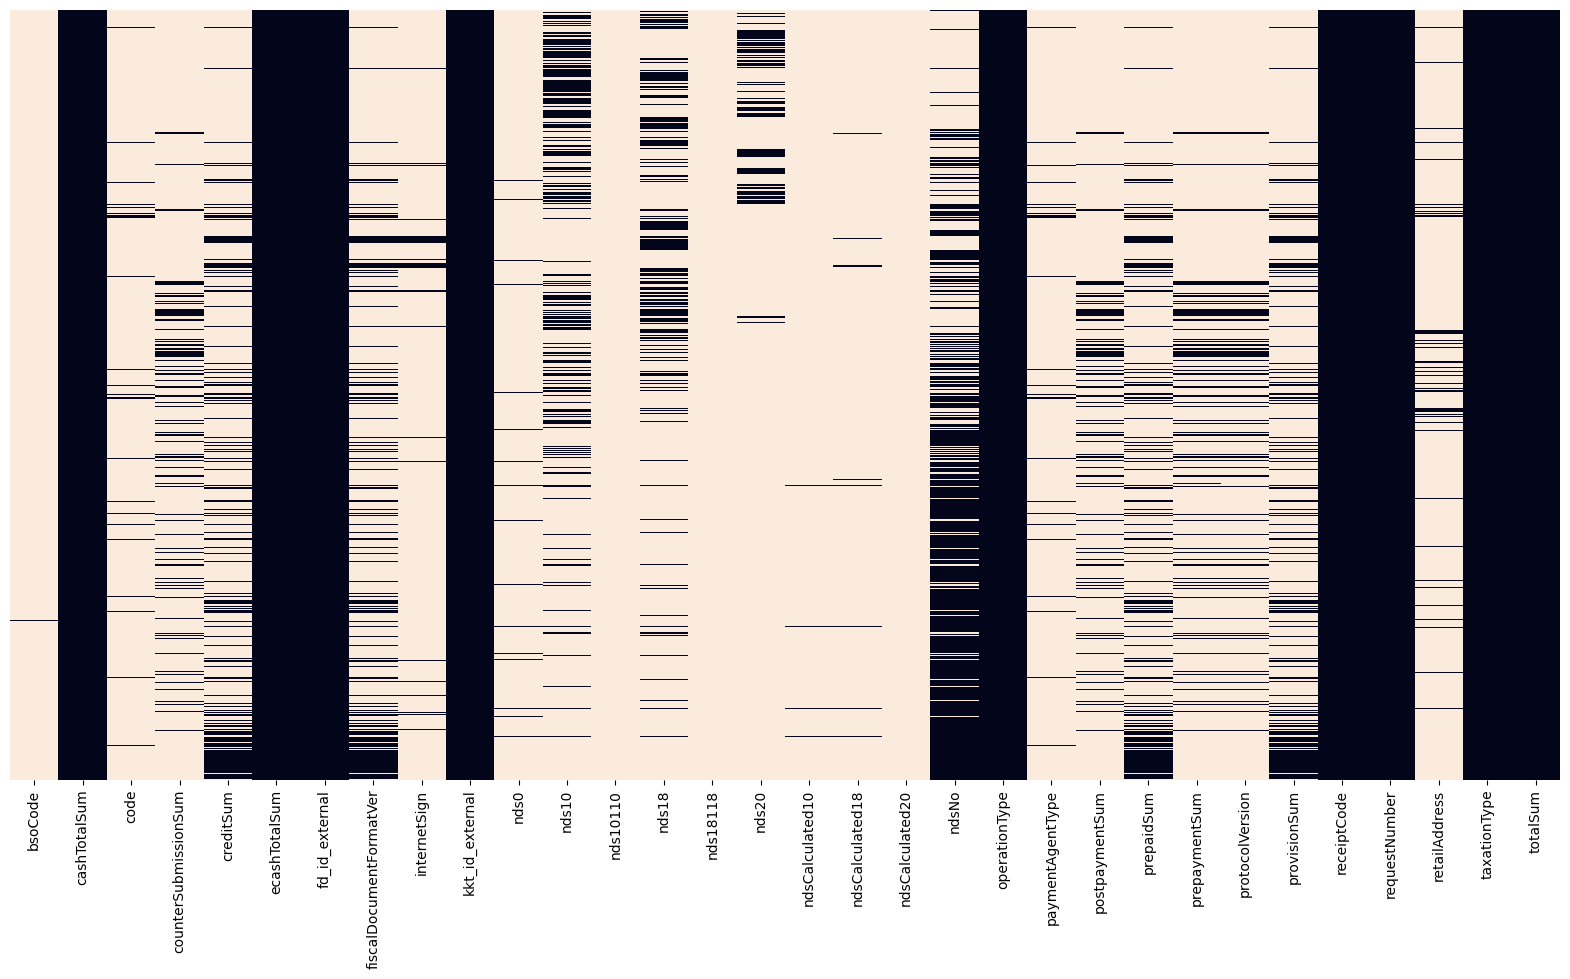

In [29]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_with_columns.isnull(), yticklabels=False, cbar=False)

In [51]:
data_with_columns['fiscalDocumentFormatVer'].fillna(data_with_columns['protocolVersion'].replace({1:11, 2:22}), inplace=True)
data_with_columns['prepaidSum'].fillna(data_with_columns['prepaymentSum'], inplace=True)
data_with_columns['creditSum'].fillna(data_with_columns['postpaymentSum'], inplace=True)
data_with_columns['provisionSum'].fillna(data_with_columns['counterSubmissionSum'], inplace=True)

In [53]:
data_with_columns.drop(['protocolVersion', 'prepaymentSum', 'postpaymentSum', 'counterSubmissionSum'], axis=1, inplace=True)

In [103]:
data_with_columns['paymentAgentType'] = pd.Categorical(data_with_columns['paymentAgentType']).codes
data_with_columns['fiscalDocumentFormatVer'] = pd.Categorical(data_with_columns['fiscalDocumentFormatVer']).codes
data_with_columns['internetSign'] = pd.Categorical(data_with_columns['internetSign']).codes

In [98]:
data_with_columns.fillna(dict(zip(['creditSum', 'nds0', 'nds10', 'nds10110', 'nds18', 'nds18118', 'nds20', 'ndsCalculated10', 
                   'ndsCalculated18', 'ndsCalculated20', 'ndsNo', 'prepaidSum', 'provisionSum'], [0]*13)), inplace=True)

<Axes: >

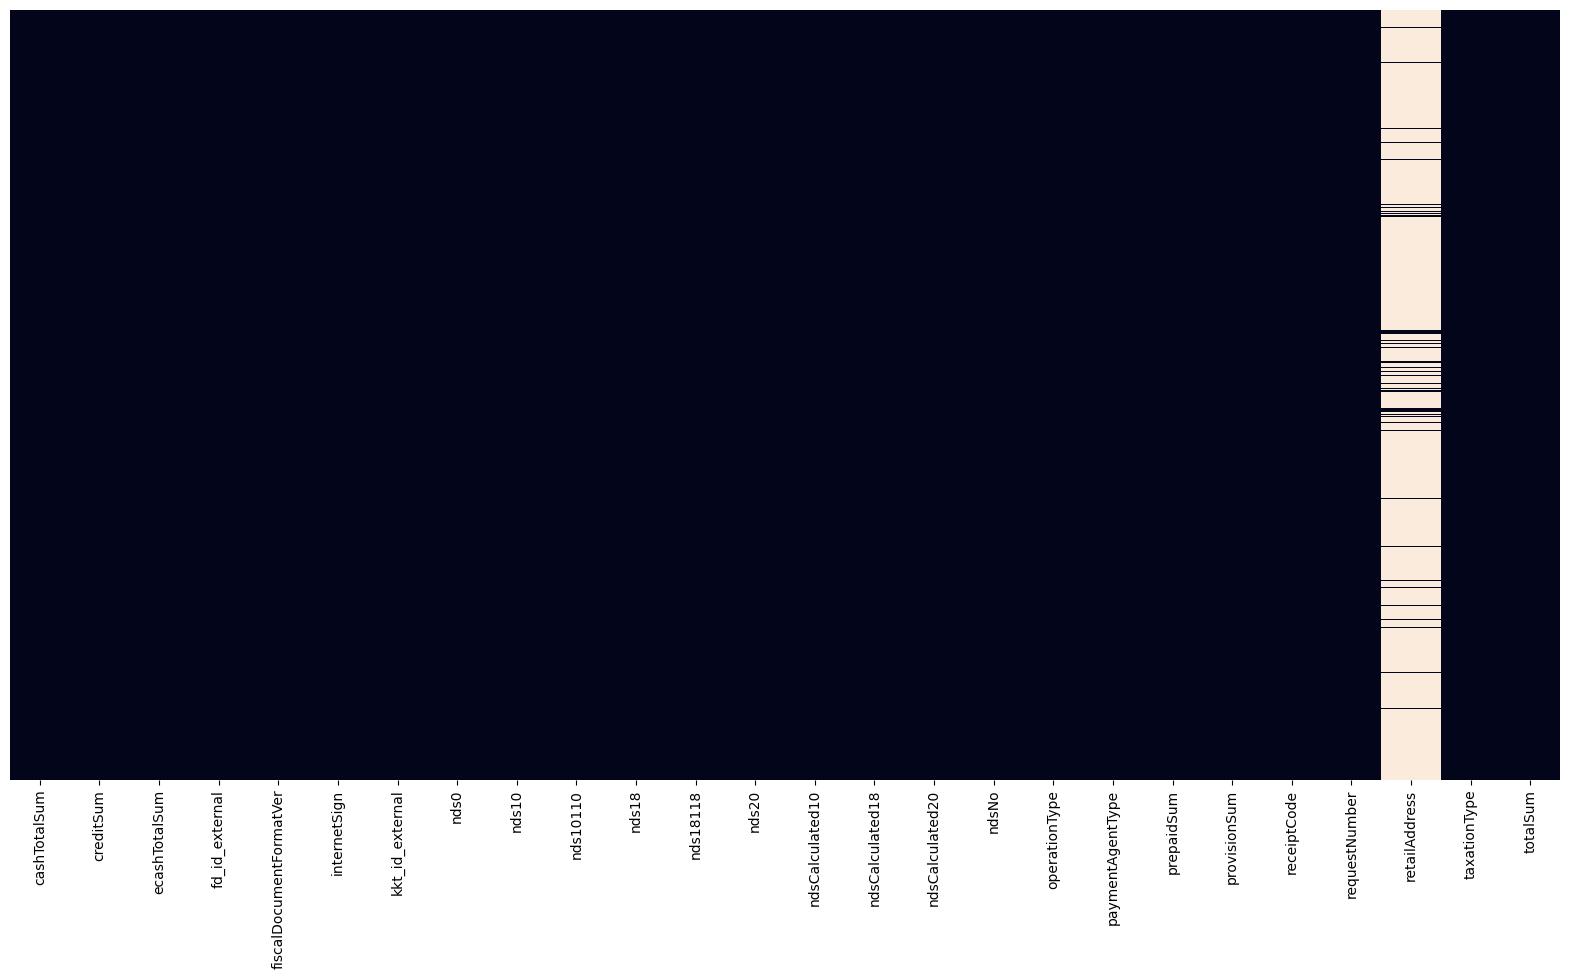

In [104]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_with_columns.isnull(), yticklabels=False, cbar=False)

In [105]:
data_with_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cashTotalSum             100001 non-null  object 
 1   creditSum                100001 non-null  float64
 2   ecashTotalSum            100001 non-null  object 
 3   fd_id_external           100000 non-null  object 
 4   fiscalDocumentFormatVer  100001 non-null  int8   
 5   internetSign             100001 non-null  int8   
 6   kkt_id_external          100000 non-null  object 
 7   nds0                     100001 non-null  int64  
 8   nds10                    100001 non-null  int64  
 9   nds10110                 100001 non-null  int64  
 10  nds18                    100001 non-null  int64  
 11  nds18118                 100001 non-null  int64  
 12  nds20                    100001 non-null  int64  
 13  ndsCalculated10          100001 non-null  int64  
 14  ndsC

In [16]:
# data_with_columns.to_csv('parsed_data_fiscal_mln.csv', sep=';', encoding='utf-8', index=False)

In [17]:
import re
import numpy as np
def find_six_digit_substring(input_string):
    # Используем регулярное выражение для поиска подстроки из 6 цифр
    # print(input_string, type(input_string))
    if isinstance(input_string, str):
        match = re.search(r'\b\d{6}\b', input_string)
        
        if match:
            return match.group(0)
        else:
            return None
    else: np.nan

for_map = data_with_columns[["retailAddress", 'operationType']]
for_map['retailAddress'] = for_map['retailAddress'].apply(lambda x: find_six_digit_substring(x))
for_map.dropna(inplace=True)
for_map = for_map.groupby('retailAddress').count().sort_values('operationType', ascending=False)
for_map

C:\Users\Максим\AppData\Local\Temp\ipykernel_21176\2311695220.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_map['retailAddress'] = for_map['retailAddress'].apply(lambda x: find_six_digit_substring(x))
C:\Users\Максим\AppData\Local\Temp\ipykernel_21176\2311695220.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_map.dropna(inplace=True)


,operationType
retailAddress,
681000,564
190000,490
681014,386
143900,344
634045,310
...,...
350061,1
347949,1
346130,1


In [18]:
for_map = for_map.reset_index()
for_map# = for_map[for_map['dateTime'] > 1]

,retailAddress,operationType
0,681000,564
1,190000,490
2,681014,386
3,143900,344
4,634045,310
...,...,...
1880,350061,1
1881,347949,1
1882,346130,1
1883,309000,1


In [19]:
import pandas as pd
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

# # Пример данных с адресами
# data = {
#     'Address': ['Москва, Россия', 'Санкт-Петербург, Россия', 'Новосибирск, Россия'],
#     'Value': [10, 20, 30]  # Значения для тепловой карты
# }

# for_map = pd.DataFrame(data)

# Используем geopy для преобразования адресов в географические координаты
geolocator = Nominatim(user_agent="heatmap_app")
for_map['Coordinates'] = for_map['retailAddress'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude) if x is not None else None)

# # Создаем базовую карту с помощью folium
# for_map.dropna(inplace=True)
# map_heat = folium.Map(location=[55.7558, 37.6176], zoom_start=5)

# # Добавляем тепловую карту с координатами из DataFrame
# heat_data = [[row['Coordinates'][0], row['Coordinates'][1], row['dateTime']] for index, row in for_map.iterrows()]
# HeatMap(heat_data).add_to(map_heat)

# # Сохраняем карту в HTML-файл
# map_heat.save("heatmap1.html")

# from IPython.display import IFrame

# # Отображаем тепловую карту в Jupyter Notebook
# IFrame(src='heatmap.html', width=700, height=600)


In [20]:
for_map.dropna(inplace=True)
map_heat = folium.Map(location=[55.7558, 37.6176], zoom_start=5)

# Добавляем тепловую карту с координатами из DataFrame
heat_data = [[row['Coordinates'][0], row['Coordinates'][1], row['operationType']] for index, row in for_map.iterrows()]
HeatMap(heat_data).add_to(map_heat)

# Сохраняем карту в HTML-файл
map_heat.save("heatmap1.html")

from IPython.display import IFrame

# Отображаем тепловую карту в Jupyter Notebook
IFrame(src='heatmap1.html', width=700, height=600)

In [ ]:
for_map[for_map['Coordinates'].isna()]

In [ ]:
for_map.loc[0, 'retailAddress']

In [ ]:
from geopy.geocoders import Nominatim

# Создаем объект геокодера
geolocator = Nominatim(user_agent="geoapiExercises")

# Адрес для преобразования
address = '124498'

# Получаем координаты
location = geolocator.geocode(address)

# Выводим координаты
if location:
    print((location.latitude, location.longitude))
else:
    print("Адрес не найден")

In [ ]:
55.994445, 37.207533

In [ ]:
import json

# assigns a JSON string to a variable called jess 
jess = '{"fd_id_external": "e35d7164ee96e9aaf68b73c96fcb5bdc","json_external":{"receiptCode":3,"fiscalDocumentNumber":11278,"dateTime":"2020-10-11","shiftNumber":35,"requestNumber":48,"operationType":1,"totalSum":9215,"items":[{"name":"Продажа на сумму","price":9215,"quantity":1,"sum":9215}],"cashTotalSum":9215,"ecashTotalSum":0,"ndsNo":9215,"retailAddress":"652888, Кемеровская область, г. Междуреченск, ул. Октябрьская, д. 3А","taxationType":8},"kkt_id_external":"137f0b74c99ad372af7022794574d8e4"}'

# parses the data and assigns it to a variable called jess_dict
jess_dict = json.loads(jess)

print(json.dumps(jess_dict, indent=2))       